In [1]:
import imageio
import torch
from IPython.display import clear_output
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PyQt5
import skimage.morphology as morph
import skimage

from dataProcessing import *

%matplotlib inline

In [2]:
### Load data ####
timeResolution = np.array([25, 16, 17, 15, 15, 17, 14])
spatialDownsamplingFactor=2
noVideos=2

dataPath='data/usliverseq-mp4'
videoList = loadData(dataPath,timeResolution,spatialDownsamplingFactor=spatialDownsamplingFactor,noVideos=noVideos)

### Get affine transformation ###

ptsArray = np.load('transPts.npz')["arr_0"]/spatialDownsamplingFactor

# We agree on a reference video which all other videos are transformed to, video 2, i.e. video index 1
refIdx=1

videoTransList = getAffineTrans(videoList,ptsArray,refIdx)

### Mask everything outside field of view and smooth pixels out ###

# Define smoothing parameter sigma
sigma=(0,3,3) # Do not smooth over temporal dim, only spatial
videoTransMaskList, morphsInput, vidMasks = maskAndSmooth(videoTransList,sigma)


Loading video 1/2..
    Spatial resolution before spatial downsampling: 640 x 480
    No. of frames before temporal downsampling: 14516
    Downsampling from 25 to 14 frames per second
    Spatial resolution before spatial downsampling: 320 x 240
    No. of frames after temporal downsampling: 8120

Loading video 2/2..
    Spatial resolution before spatial downsampling: 712 x 480
    No. of frames before temporal downsampling: 4372
    Downsampling from 16 to 14 frames per second
    Spatial resolution before spatial downsampling: 356 x 240
    No. of frames after temporal downsampling: 3822



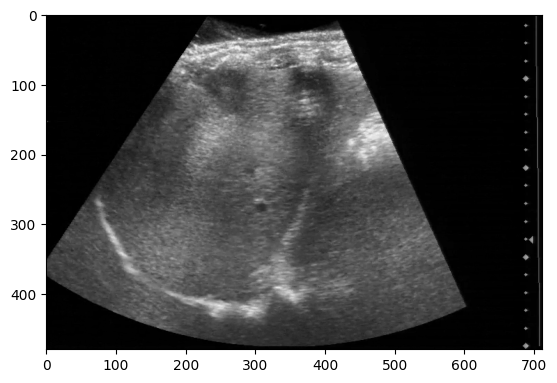

In [97]:
# Example on how to visualize frames in a video

videoIdx = 1 # Choose video to visualize
noFrames = 100 # Choose first noFrames to visualize

vidShow=videoList[videoIdx][:noFrames]
for i in range(noFrames):
    plt.imshow(vidShow[i],cmap='gray')
    plt.show()
    clear_output(wait=True)

Text(0.5, 1.0, 'Final processed video')

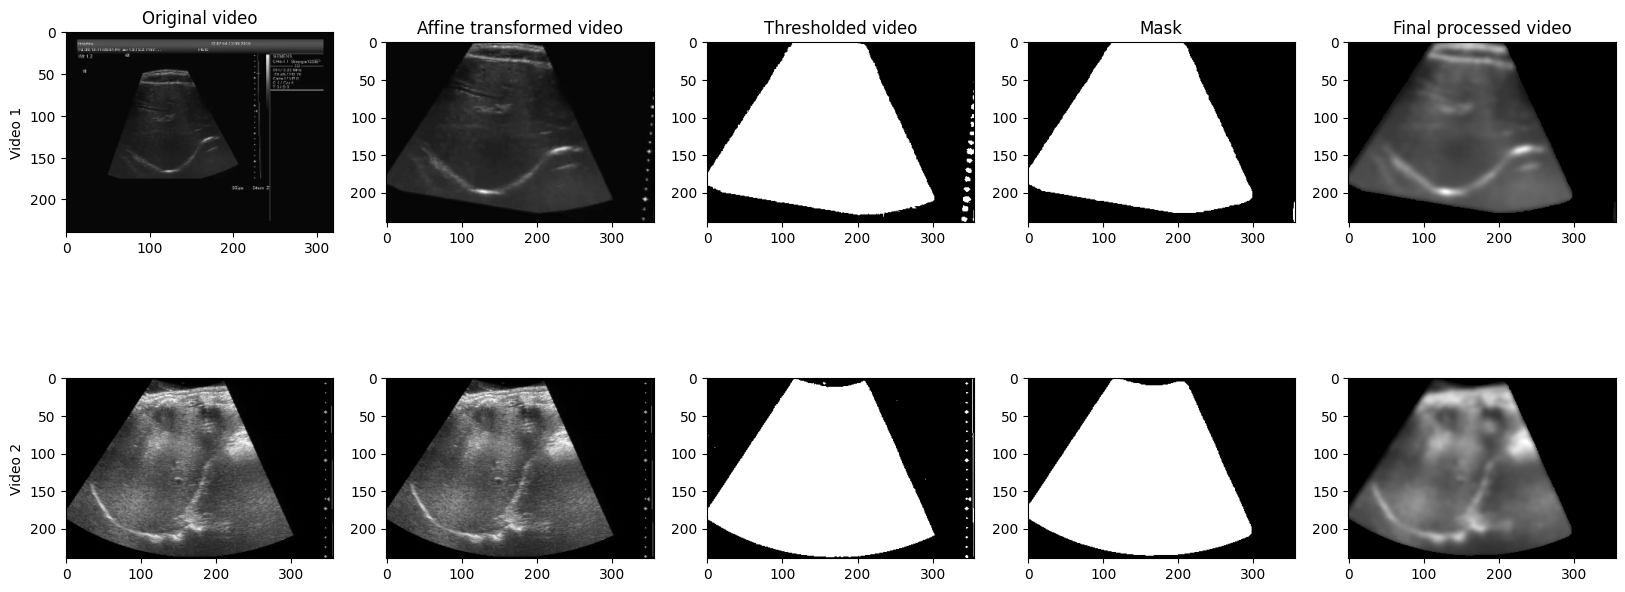

In [3]:
fig,ax = plt.subplots(len(videoList),5,figsize=(20,4*len(videoList)))
for vidIdx in range(len(videoList)):
        ax[vidIdx,0].imshow(videoList[vidIdx][0],cmap='gray')
        ax[vidIdx,1].imshow(videoTransList[vidIdx][0],cmap='gray')
        ax[vidIdx,2].imshow(morphsInput[vidIdx],cmap='gray')
        ax[vidIdx,3].imshow(vidMasks[vidIdx],cmap='gray')
        ax[vidIdx,4].imshow(videoTransMaskList[vidIdx][0],cmap='gray')
        ax[vidIdx,0].set_ylabel(f'Video {vidIdx+1}')
ax[0,0].set_title('Original video')
ax[0,1].set_title('Affine transformed video')
ax[0,2].set_title('Thresholded video')
ax[0,3].set_title('Mask')
ax[0,4].set_title('Final processed video')


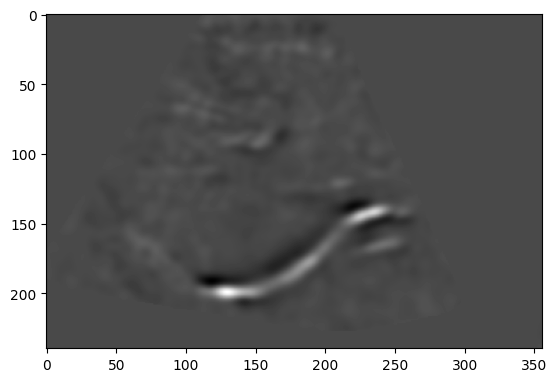

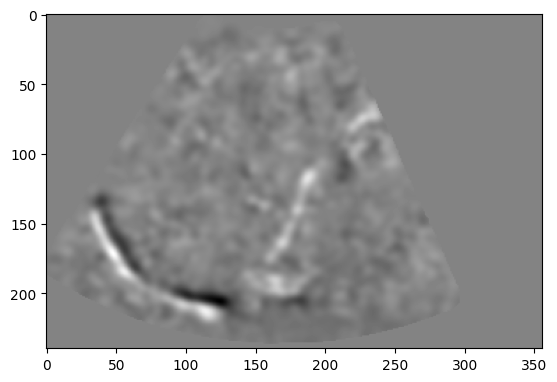

In [13]:
# subtract mean for all pixels
vidStd = []
for vid in videoTransMaskList:
    vidMean=vid-vid.mean(axis=0)
    vidStd.append(vidMean)
    plt.figure()
    plt.imshow(vidMean[0],cmap='gray')

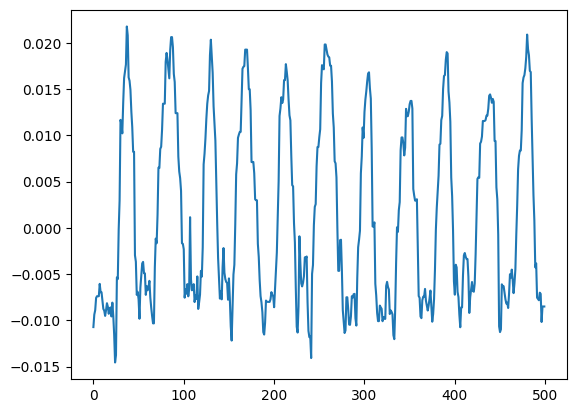

In [18]:
plt.plot(vidMean[:500,200,200])